In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf

import os
# Seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df = pd.read_csv("data/data-02-stock_daily.csv", header=1)
print(df.head())
print(df.info())

         Open        High         Low   Volume       Close
0  828.659973  833.450012  828.349976  1247700  831.659973
1  823.020020  828.070007  821.655029  1597800  828.070007
2  819.929993  824.400024  818.979980  1281700  824.159973
3  819.359985  823.000000  818.469971  1304000  818.979980
4  819.000000  823.000000  816.000000  1053600  820.450012
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    732 non-null    float64
 1   High    732 non-null    float64
 2   Low     732 non-null    float64
 3   Volume  732 non-null    int64  
 4   Close   732 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 28.7 KB
None


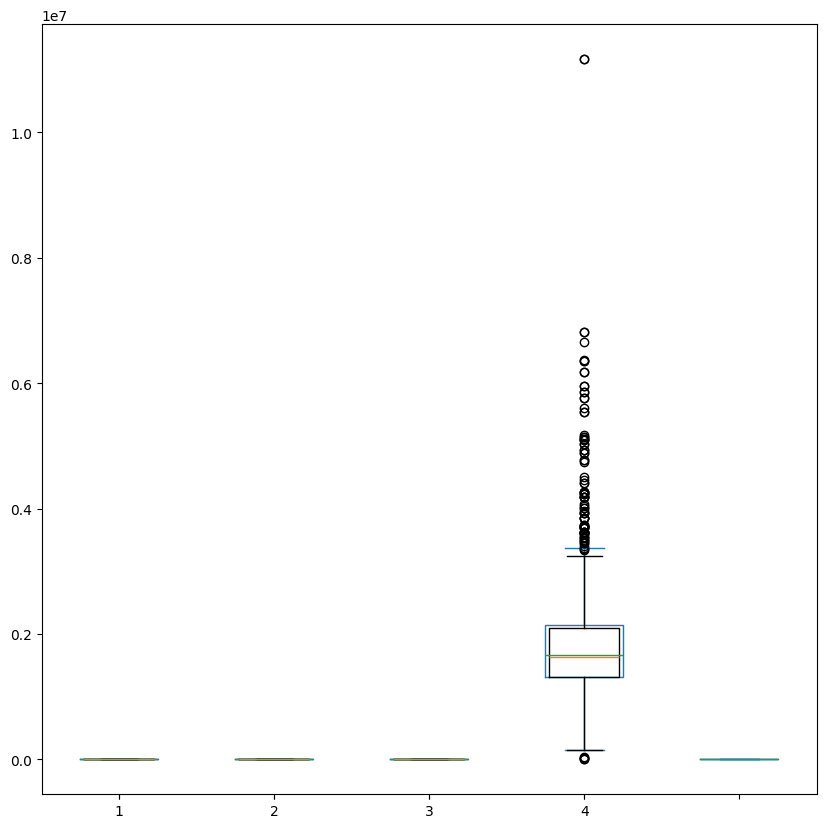

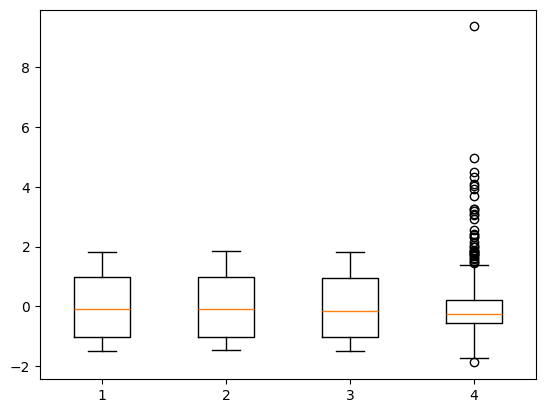

In [4]:
dataset = df.values
X = dataset[:,0:4] # astype?
Y = dataset[:,4]
df.plot.box(figsize=(10,10))
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=seed)
#Xtrain만 boxpLot으로 시각화 확인
plt.boxplot(X_train)
plt.show()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
plt.boxplot(X_train)
plt.show()

In [15]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=10)

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)
# 모델 저장 조건 설정
modelpath="model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5000, batch_size=10, 
                    callbacks=[early_stopping_callback, checkpointer])
hist = pd.DataFrame(history.history)

Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 432238.9375 
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 431485.3438
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 430418.7812
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 428869.7812
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 426647.6875
Epoch 6/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 423563.8125
Epoch 7/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 419433.0625
Epoch 8/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 414087.3750
Epoch 9/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 407276.3125
Epoch 10/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 398138.4688
Epoch 11/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 387225.6875
Epoch 12/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 374468.3438
Epoch 13/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 359804.3750
Epoch 14/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - lo

          loss   val_loss
477  10.120832  14.559313
478  10.116899  14.561022
479  10.112864  14.559649
480  10.108794  14.561102
481  10.104878  14.562045


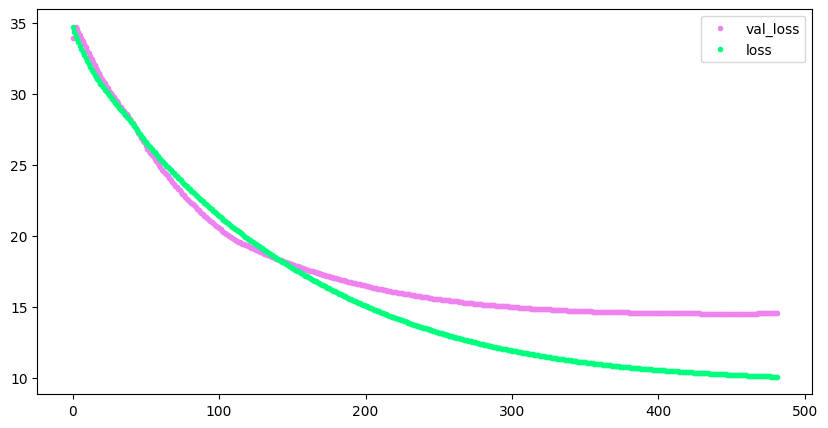

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
실제가격: 715.290, 예상가격: 716.787
실제가격: 720.090, 예상가격: 717.288
실제가격: 796.790, 예상가격: 796.063
실제가격: 794.020, 예상가격: 791.895
실제가격: 629.250, 예상가격: 632.471
실제가격: 731.230, 예상가격: 734.744
실제가격: 738.870, 예상가격: 741.901
실제가격: 509.962, 예상가격: 507.965
실제가격: 539.367, 예상가격: 537.385
실제가격: 807.910, 예상가격: 805.280


In [16]:
print(hist.tail())
y_vloss=history.history['val_loss']
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_loss=history.history['loss']
import matplotlib.pyplot as plt
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_loss))
plt. figure(figsize=(10, 5))
plt.plot(x_len, y_vloss, "o", c="violet", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="springgreen", markersize=3, label='loss')
plt.legend()
plt.show()
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

Average Error: 2.7138195063298998


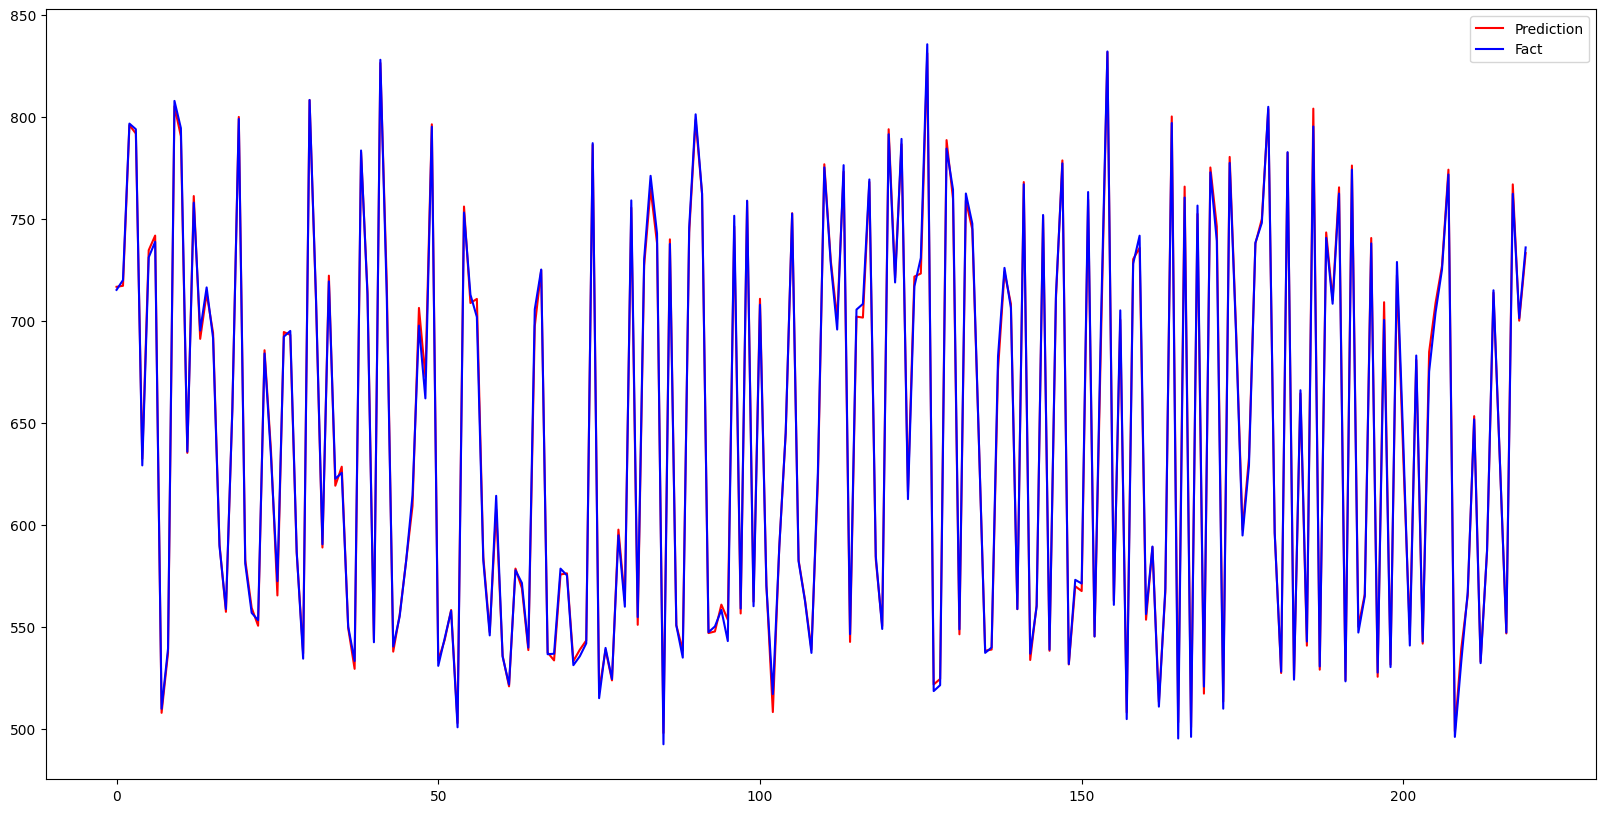

In [22]:
#예측값과 실제값 그래프로 비교
plt.figure(figsize=(20, 10))
plt.plot(Y_prediction, c='red', label='Prediction')
plt.plot(Y_test,c='blue', label='Fact')
plt.legend()
#예측값과 실제값 오차 평균을 측정
avr = abs(Y_prediction - Y_test).mean()
print("Average Error:", avr)

스케일러 저장

In [5]:
from pickle import dump , load

# save model
dump(scaler, open('scaler.pkl', 'wb'))



- mse: 일반적인 데이터에서 성능이 좋음
- mae: 오차가 크더라도 덜 민감해서 이상치에 견고함